nhận diện sinh viên trong lớp AI

In [1]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [2]:
import numpy as np
import matplotlib.pyplot as plt
from os import listdir
from numpy import asarray,save
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score
from time import time
from keras.utils import load_img, img_to_array
from keras.utils  import to_categorical
from keras.models import Sequential, Model
from keras.layers import *
from keras.layers import LeakyReLU
from keras.optimizers import Adam
from keras.engine.training import optimizers
from keras.backend import categorical_crossentropy


In [3]:
folder = '/content/drive/MyDrive/anh_lop/'

img_size = 30;
photos, labels = list(), list()
for file in listdir(folder) :
  output = 0.0
  if file.startswith('quyen'):
    output = 1.0
  if file.startswith('ha'):
    output = 2.0
  if file.startswith('luan'):
    output = 3.0
  if file.startswith('kiet'):
    output = 4.0
  if file.startswith('thao'):
    output = 5.0
  if file.startswith('loc'):
    output = 6.0
  if file.startswith('tien'):
    output = 7.0
  if file.startswith('tung'):
    output = 8.0
  if file.startswith('minh'):
    output = 9.0
  if file.startswith('thang'):
    output = 10.0
  photo = load_img(folder + file, target_size = (img_size,img_size))
  photo = img_to_array(photo)
  photos.append(photo)
  labels.append(output)
photos = asarray(photos)
labels = np.array(labels)
print(photos.shape, labels.shape)
# save('/content/drive/MyDrive/anh/hoa/hoa_photos.npy',photos)
# save('/content/drive/MyDrive/anh/hoa/hoa_labels.npy',labels)

(578, 30, 30, 3) (578,)


In [4]:
photos = photos.astype('float32')/255.0

print(photos.shape)

(578, 30, 30, 3)


In [5]:
(trainX, testX, trainY, testY) = train_test_split(photos, labels, test_size=0.15, stratify=labels, random_state=10)

(trainX, valX, trainY, valY) = train_test_split(trainX, trainY, test_size=0.17, random_state=10)

print(trainX.shape)
print(trainY.shape)
print(testX.shape)
print(testY.shape)
print(valX.shape)
print(valY.shape)

(407, 30, 30, 3)
(407,)
(87, 30, 30, 3)
(87,)
(84, 30, 30, 3)
(84,)


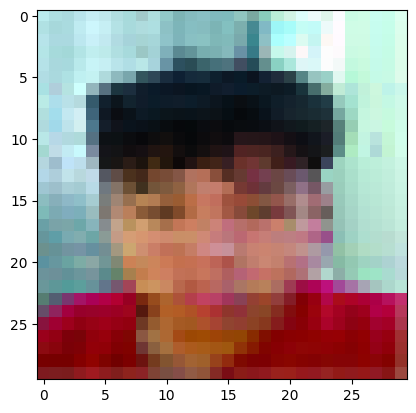

Cái này là:  4.0


In [6]:
image_test=6
hinh = trainX[image_test]
plt.imshow(hinh) 
plt.show()  
print('Cái này là: ', trainY[image_test])
#{1:'quyen', 2:'tien',3:'trong',4:'thinh',5:'loc'}

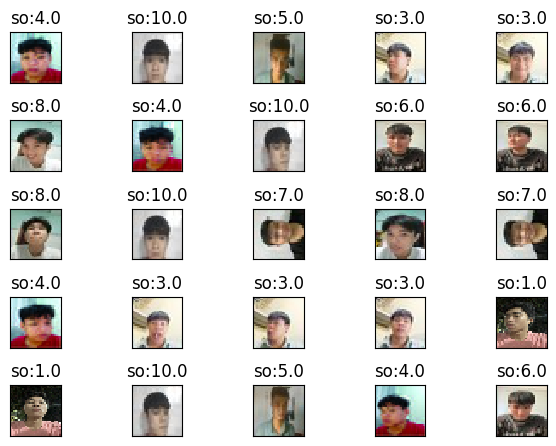

In [8]:
for i in range(25):  # 30 hình ảnh
  plt.subplot(5,5,i+1) # 6 cột , 5 hàng
  plt.tight_layout()
  plt.imshow(trainX[i], interpolation='none')
  plt.title('so:{}'.format(trainY[i]))
  plt.xticks([])
  plt.yticks([])
  

In [7]:
 #one hot enccoding giatri mau tung diem anh tu thap phan duoi dang 10 bit
trainY = to_categorical (trainY)
testY=to_categorical(testY)
valY=to_categorical(valY)

print(trainY.shape)
print(testY.shape)
print(valY.shape)

(407, 11)
(87, 11)
(84, 11)


In [8]:

batch_size=128
epochs=20
classes =11

#Tạo 1 mạng có 28x28 input và 10 output
model = Sequential()

# 1 bộ VGG
model.add(Conv2D(32, kernel_size=(3,3), activation = 'linear', input_shape=(30,img_size,3),padding = 'same'))
model.add(LeakyReLU(alpha=0.1))  # Hàm xử lý dữ liệu (Ngưỡng)
model.add(MaxPooling2D((2,2), padding='same'))


# Bộ 2 VGG
model.add(Conv2D(64,(3,3) , activation = 'linear' , padding = 'same'))
model.add(LeakyReLU(alpha = 0.1)) # Hàm xử lý dữ liệu (Ngưỡng)
model.add(MaxPooling2D((2,2), padding = 'same'))


# Bộ 3 VGG
model.add(Conv2D(128,(3,3) , activation = 'linear' , padding = 'same'))
model.add(LeakyReLU(alpha = 0.1)) # Hàm xử lý dữ liệu (Ngưỡng)
model.add(MaxPooling2D((2,2), padding = 'same'))

# Bộ 4 VGG
model.add(Conv2D(256,(3,3) , activation = 'linear' , padding = 'same'))
model.add(LeakyReLU(alpha = 0.1)) # Hàm xử lý dữ liệu (Ngưỡng)
model.add(MaxPooling2D((2,2), padding = 'same'))

# Bộ 5 VGG
model.add(Conv2D(512,(3,3) , activation = 'linear' , padding = 'same'))
model.add(LeakyReLU(alpha = 0.1)) # Hàm xử lý dữ liệu (Ngưỡng)
model.add(MaxPooling2D((2,2), padding = 'same'))

# ANN Model
model.add(Flatten()) # Lấy kích thước trước rồi làm phẳng
model.add(Dense(512, activation = 'linear'))

model.add(LeakyReLU(alpha = 0.1))
model.add(Dense(classes, activation = 'softmax'))     



model.compile(loss = categorical_crossentropy, optimizer = Adam() , metrics=['accuracy'])
model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d (Conv2D)             (None, 30, 30, 32)        896       
                                                                 
 leaky_re_lu (LeakyReLU)     (None, 30, 30, 32)        0         
                                                                 
 max_pooling2d (MaxPooling2D  (None, 15, 15, 32)       0         
 )                                                               
                                                                 
 conv2d_1 (Conv2D)           (None, 15, 15, 64)        18496     
                                                                 
 leaky_re_lu_1 (LeakyReLU)   (None, 15, 15, 64)        0         
                                                                 
 max_pooling2d_1 (MaxPooling  (None, 8, 8, 64)         0         
 2D)                                                    

In [9]:
start = time()
train = model.fit(trainX, trainY, batch_size,epochs=epochs,verbose = 1, validation_data=(valX, valY))
print(time()-start)

Epoch 1/20
4/4 [==============================] - 10s 287ms/step - loss: 2.3636 - accuracy: 0.1523 - val_loss: 2.2918 - val_accuracy: 0.0714
Epoch 2/20
4/4 [==============================] - 0s 18ms/step - loss: 2.2489 - accuracy: 0.1204 - val_loss: 2.0620 - val_accuracy: 0.5000
Epoch 3/20
4/4 [==============================] - 0s 17ms/step - loss: 1.8418 - accuracy: 0.5184 - val_loss: 1.3956 - val_accuracy: 0.3929
Epoch 4/20
4/4 [==============================] - 0s 19ms/step - loss: 1.1293 - accuracy: 0.5971 - val_loss: 0.7054 - val_accuracy: 0.7976
Epoch 5/20
4/4 [==============================] - 0s 17ms/step - loss: 0.5627 - accuracy: 0.8231 - val_loss: 0.2540 - val_accuracy: 0.9286
Epoch 6/20
4/4 [==============================] - 0s 19ms/step - loss: 0.2532 - accuracy: 0.9214 - val_loss: 0.2493 - val_accuracy: 0.9048
Epoch 7/20
4/4 [==============================] - 0s 17ms/step - loss: 0.1508 - accuracy: 0.9509 - val_loss: 0.1519 - val_accuracy: 0.9286
Epoch 8/20
4/4 [=========

Text(0.5, 0, 'Epoch')

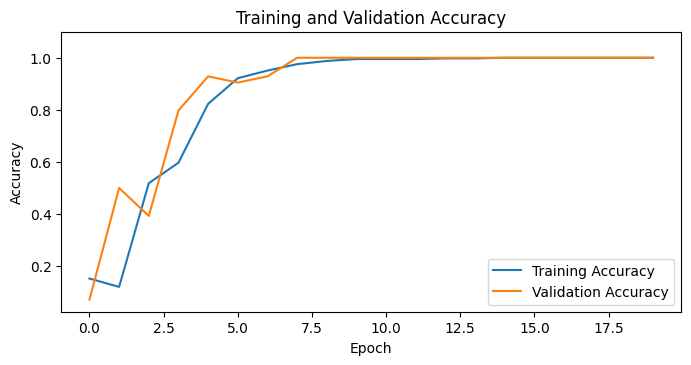

In [10]:
acc=train.history['accuracy']
val_acc=train.history['val_accuracy']

plt.figure(figsize=(8, 8))
plt.subplot(2, 1, 1)
plt.plot(acc, label='Training Accuracy')
plt.plot(val_acc, label='Validation Accuracy')

plt.legend(loc='lower right')
plt.ylabel('Accuracy')
plt.ylim([min(plt.ylim()),1.1])
plt.title('Training and Validation Accuracy')
plt.xlabel('Epoch')

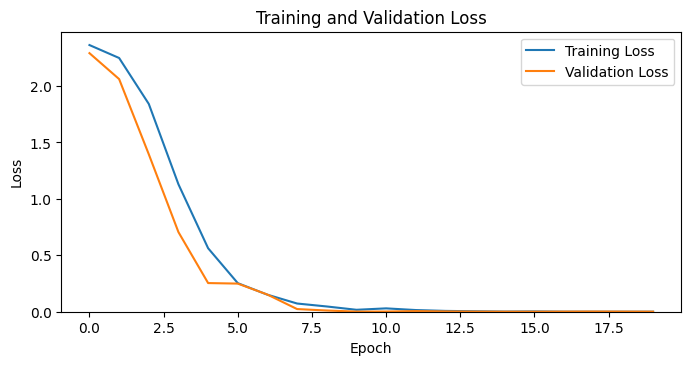

In [11]:
acc=train.history['accuracy']
val_acc=train.history['val_accuracy']
loss=train.history['loss']
val_loss=train.history['val_loss']

plt.figure(figsize=(8, 8))
plt.subplot(2, 1, 2)
plt.plot(loss, label='Training Loss')
plt.plot(val_loss, label='Validation Loss')
plt.legend(loc='upper right')
plt.ylabel('Loss')
plt.ylim(0)
plt.title('Training and Validation Loss')
plt.xlabel('Epoch')
plt.show()

In [12]:

# Tạo một mảng các chỉ số ngẫu nhiên
random_indices = np.random.choice(len(testX), size=45, replace=False)

# Lấy ra 30 mẫu ngẫu nhiên từ tập dữ liệu testX và testY
random_testX = testX[random_indices]
random_testY = testY[random_indices]

# Dùng mô hình để dự đoán nhãn của các mẫu trong tập dữ liệu ngẫu nhiên
results = model.predict(random_testX)
predicted_labels = np.argmax(results, axis=1)

accuracy = accuracy_score(np.argmax(random_testY, axis=1), predicted_labels)
print("Accuracy:", accuracy*100,"%")

2/2 [==============================] - 0s 149ms/step
Accuracy: 97.77777777777777 %
